# LEPL1106, Devoir 2 : convolution et réponse impulsionnelle

## 0) Introduction

On va s'intéresser pour ce devoir à l'opération de convolution $*$ (en temps discret), et plus particulièrement, à son utilisation pour modéliser la sortie $y[n]$ d'un système $H$ dont la réponse impulsionnelle est $h[n]$. Pour une entrée $x[n]$, on a ainsi

$$y[n] = (x * h)[n] = \sum_k x[n-k] h[k].$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Dans [NumPy](http://www.numpy.org/), une implémentation possible$^1$ de la convolution est donnée par `np.convolve` :

$^1$*Un petit teaser pour les plus curieux d'entre vous : `np.convolve` implémente la convolution de manière "naïve" en appliquant directement la définition ci-dessus. Pour deux signaux de taille égale $N$ (si `x.size = h.size = N`), cette implémentation a une complexité algorithmique de $\mathcal O(N^2)$, ce peut être assez lourd pour $N$ grand (ci-dessous, ce souci n'apparaitra pas car les `h` que nous considérons ont un support très court). Heureusement, grâce au **théorème de la convolution** (que vous verrez plus tard dans le cours) et l'algorithme FFT qui calcule la **transformée de Fourier discrète**  (idem) de façon très efficace, il existe une autre implémentation, disponible via `scipy.signal.fftconvolve` du package `scipy` (SCIentific PYthon), qui a complexité $\mathcal O(N \log(N))$, ce qui est bien plus rapide pour les grandes valeurs de $N$. On reviendra là-dessus plus tard, quand nous étudierons le **filtrage** des signaux.*


In [10]:
help(np.convolve)

Help on function convolve in module numpy:

convolve(a, v, mode='full')
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    The convolution operator is often seen in signal processing, where it
    models the effect of a linear time-invariant system on a signal [1]_.  In
    probability theory, the sum of two independent random variables is
    distributed according to the convolution of their individual
    distributions.
    
    If `v` is longer than `a`, the arrays are swapped before computation.
    
    Parameters
    ----------
    a : (N,) array_like
        First one-dimensional input array.
    v : (M,) array_like
        Second one-dimensional input array.
    mode : {'full', 'valid', 'same'}, optional
        'full':
          By default, mode is 'full'.  This returns the convolution
          at each point of overlap, with an output shape of (N+M-1,). At
          the end-points of the convolution, the signals do not overlap
          co

## 1) Convolution

Comme première tâche cette semaine, nous vous demandons d'écrire une fonction qui retourne la convolution entre deux signaux $x[n]$ et $h[n]$.

> Trop facile, `np.convolve` et c'est plié !
>
> --- étudiant anonyme

Oui, mais : on vous demande de faire particulièrement attention aux *indices* qui correspondent au résultat de la convolution ! Plus précisément donc, on vous demande d'écrire la fonction `convolution(x,nx,h,nh)`, où 

* Le numpy array `x` contient les valeurs du signal $x[n]$ évaluées aux indices correspondant dans `nx` (un numpy array d'entiers consécutifs). **Remarque** on suppose que $x[n] = 0$ en dehors des indices fournis dans `nx`. 
* Similairement, l'array `h` représente le signal $h[n]$ aux indices dans `nh`.

Par exemple, le signal "triangle" de "base" $2T-1$, donné par $h[n] = r[n + T] - 2r[n] + r[n-T]$, sera représenté ainsi :



h  :  [1 2 3 4 3 2 1]
nh :  [-3 -2 -1  0  1  2  3]


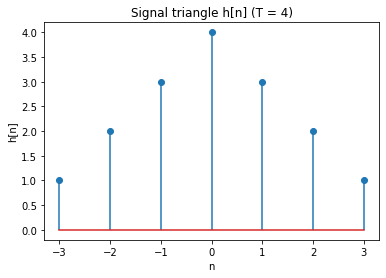

In [11]:
T = 4
h = np.append(np.arange(1,T),np.arange(T,0,-1))
nh = np.arange(-(T-1),T)

print("h  : ",h)
print("nh : ",nh)

# N.B.: 
# les plots "rapides" que vous nous fournissont comme moyen de test rapide 
# ne constituent pas spécialement un exemple de plot complet et rigoureux (du niveau demandé sur inginious) ;-)
plt.stem(nh,h)
plt.title(f"Signal triangle h[n] (T = {T})")
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

Votre fonction `convolution` doit renvoyer deux vecteurs (numpy array), `y` et `ny`, où `y` contient les valeurs du signal $y[n]$ évalué aux indices retournés dans `ny` (attention à bien retourner un *tuple* `(y,ny)`). Le vecteur `ny` est donc un vecteur d'entiers consécutifs, qui contient toutes les valeurs de $n$ où la convolution peut être non-nulle.

In [12]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def convolution(x,nx,h,nh):
    """
    Fonction de convolution qui retourne un tuple avec les valeurs du 
    signal y (la convolution) et les indices de ce signal (ny)

    Args:
        x (numpy array): un array des valeurs du signal x  
        nx (numpy array): un array des indices du signal x
        h (numpy array): un array des valeurs du signal h
        nh (numpy array): un array des indices du signal h

    Returns:
        tuple : un tuple contenant y la convolution de x et 
        h, et ny les indices de cettes convolution
    """
    y  = np.convolve(x,h)
    ny = np.arange(nx[0]-len(h)//2, nx[-1]+len(h)//2+len(h)%2) 
    
    return (y,ny)


In [13]:
## CELLULE DE TEST (1/2)

# Créer un signal avec quelques deltas
nx = np.arange(-10,21)
x  = np.zeros(nx.size)
deltas = [-7, 2, 13, 18] # position des deltas
x[deltas - nx[0]] = 1

print("Taille de x:  ", x.size, "\tet de nx :", nx.size)
print("Taille de h:  ", h.size, "\tet de nh :", nh.size)

(y,ny) = convolution(x,nx,h,nh)

print("Taille de y:  ", y.size, "\tet de ny :", ny.size)

Taille de x:   31 	et de nx : 31
Taille de h:   7 	et de nh : 7
Taille de y:   37 	et de ny : 37


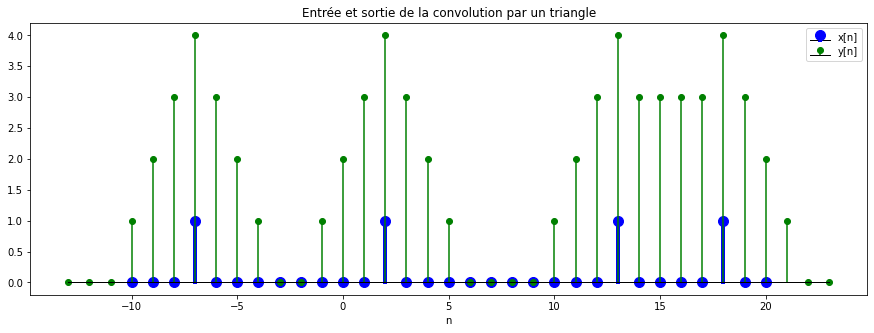

In [14]:
## CELLULE DE TEST (2/2)

plt.figure(figsize=(15,5))

markerline_x, stemlines_x, baseline_x = plt.stem(nx,x,label="x[n]", use_line_collection=False)
markerline_y, stemlines_y, baseline_y = plt.stem(ny,y,label="y[n]", use_line_collection=False)

# Baseline
for baseline in (baseline_x,baseline_y):
    baseline.set_color('k') 
    baseline.set_linewidth(1)

# x signal cosmetics
x_color = "b"
markerline_x.set_color(x_color) 
markerline_x.set_markersize(10)
for stemline in stemlines_x:
    stemline.set_color(x_color) 
    stemline.set_linewidth(4)

# y signal cosmetics
y_color = "g"
markerline_y.set_color(y_color)
for stemline in stemlines_y:  
    stemline.set_color(y_color) 

plt.title("Entrée et sortie de la convolution par un triangle")
plt.xlabel('n')

plt.legend()
plt.show()

## 2) La sortie d'un système par convolution
Pendant le début du confinement, le rappeur internationalement connu *20cent* enregistrait son dernier et plus attendu album "Le Vin Sain". Tout était prêt pour sa sortie sauf qu'il avait oublié d'enregistrer un petit refrain qui devait être chanté dans la Cathédrale de Saint Vincenzo, dont l'acoustique est unique.

Il s'est alors retrouvé face à un dilemme : la Cathédrale, étant en confinement,  n'acceptait pas la présence de son équipe pour faire l'enregistrement, mais l'album ne serait pas le même si ce refrain était enregistré autre part. 

Heureusement, il connait une personne qui maîtrise bien les applications de la convolution dans le traitement des signaux (ça c'est vous). Après avoir entendu cette triste histoire,  vous lui proposez de simuler le son de la Cathédrale de Saint Vincenzo à partir d'un enregistrement que 20cent a fait chez lui. 

Pour effectuer la simulation,vous devez encoder la **réponse impulsionnelle** de la Cathédrale, donnée sous la forme

$$h[n] = \sum_{k=0}^{M-1} a[k] \delta\big[n-d[k]\big]. $$

Cette réponse impulsionnelle, aussi appelée la  **réponse impulsionnelle de la salle** (ou *room impulse reponse*, en anglais), est constituée de $M$ réflexions acoustiques, où $a[k]$ est l'amplitude de la $k$-ème réflexion qui arrive dans le microphone avec un retard de $d[k]$ instants d'échantillonnage. En effet, le signal $h[n]$ a une taille de $L=\max(d[0],...d[M-1])+1$ échantillons et contient toute l'information acoustique de la salle.  L'ingénieur en acoustique qui travaille dans la Cathédrale vous a fourni les vecteurs $a[k]$ et $d[k]$ et donc, pour obtenir le signal simulé $y[n]$, il vous suffit de créer le signal $h[n]$ et de faire la convolution avec l'enregistrement du rappeur $x[n]$. Autrement dit, il faut calculer 

$$y[n] = (x * h)[n], $$
où $*$ est le *produit de convolution*.


On vous demande d'écrire `simulation_de_cathedrale(a,d,x,nx)` qui produit la réponse simulée $y[n]$ d'une salle décrite à partir des vecteurs $a[n]$ et $d[n]$ : pour un signal `x` (un numpy array de taille $N$ correspondant aux valeurs $x\big[n_x[0]\big], x\big[n_x[1]\big], ..., x\big[n_x[N-1]\big]$) évalué aux indices `nx` (un numpy array de taille $N$ correspondant aux valeurs $n_x[0], n_x[1], ..., n_x[N-1]$), des vecteurs `a` et `d` (des numpy arrays de taille $M$ correspondant aux valeurs $a[0], a[1], ..., a[M-1]$ et $d[0], d[1], ..., d[M-1]$) , calculez la sortie $y$ définie ci-dessus (un numpy array de taille $N$ correspondant aux valeurs $y\big[n_x[0]\big], y\big[n_x[1]\big], ..., y\big[n_x[N-1]\big]$, **de même taille que l'entrée $x$**, évaluée aux mêmes indices). 

Il vous faudra donc
1. calculer $h[n]$, évaluée aux indices $n = 0, 1, ..., L-1$ pour une taille $L \geq M$.
2. puis utiliser `convolution` pour calculer le produit de convolution $y = x * h$. Attention à bien respecter la contrainte vis-à-vis des valeurs qu'on souhaite conserver.

(précision : on suppose que les valeurs précédentes de $x$ sont nulles, i.e. $x[n] = 0$ pour $n < 0$)

In [15]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS

def simulation_de_cathedrale(a,d,x,nx):
    """

    Args:
        a (numpy array): [description]
        d ([type]): [description]
        x ([type]): [description]
        nx ([type]): [description]

    Returns:
        [type]: [description]
    """

    L = max(d) + 1
    M = a.size
    h = np.zeros(L)
    
    for l in range(L):
        for k in range(M):
            if l - d[k] == 0:
                h[l] += a[k]
    
    y = np.convolve(x, h, 'same')

    return y

### Pour tester votre fonction

Considérons comme signal $x$ un morceau de la chanson *Don't Stop Me Now* chanté par  Freddy Mercury, dans le fichier `voice_input.wav`, trouvé sur Moodle. Utilisez la cellule de test fournie ci-dessous pour simuler une salle dont la réponse impulsionnelle est donnée par `a` et `d`. Écoutez le fichier `voice_output.wav` qui sera créé dans votre ordinateur pour vérifier l'efficacité de votre fonction.

*Attention à bien télécharger le fichier `voice_input.wav` sur Moodle et à le placer dans un sous-dossier "data", lui-même placé dans le même dossier que ce notebook.*




<ipython-input-16-b3253664db77>:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fech, x = read("data/voice_input.wav")  # attention au fichier voice_input.wav


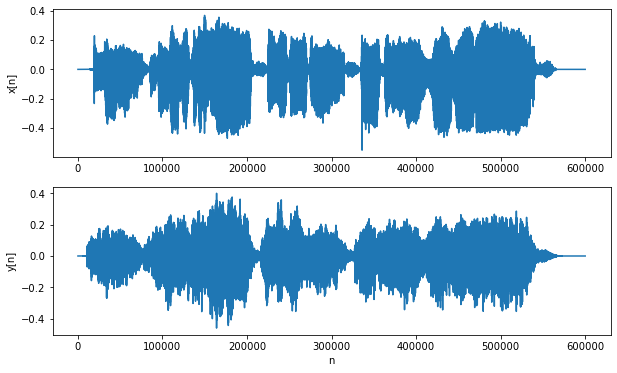

In [16]:
## CELLULE DE TEST 
a = np.arange(0.3,0,-0.015)
d = np.array([    0,   872,  2204,  5034,  5156,  5460,  5552,  5562,  7406,
               8300,  9546, 10074, 10340, 10636, 13102, 13280, 13508, 13838,
              13904, 16638])



from scipy.io.wavfile import read, write
fech, x = read("data/voice_input.wav")  # attention au fichier voice_input.wav
nx = np.arange(0,len(x))
#xFlatten = np.zeros(len(x))
#for i in range(len(x)):
#    xFlatten[i] = x[i][0]
#nxFlatten = np.arange(0, len(xFlatten))
y = simulation_de_cathedrale(a,d,x,nx)

# Un plot très rudimentaire du signal audio
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(nx,x)
plt.ylabel("x[n]")
plt.subplot(2,1,2)
plt.plot(nx,y)
plt.ylabel("y[n]")
plt.xlabel("n")
plt.show()


write("data/voice_output.wav",fech,y) 